# Mechanical Fault Diagnosis using CNN

![](https://www.taiwantrade.com/seo/img/smart_mechanic/Smart_Manufacturing_and_Mechanical_Systems_Apart.jpg)

In the era of the so called 4th
industrial revolution, the
Factory of the Future and the
Industrial Internet of Things,
the industrial mechanical
systems become continuously
more intelligent and more
complex. Therefore, there is a
clear need for research and
development on data driven
methodologies and condition
monitoring techniques which
are able to achieve fast,
reliable and high-quality
diagnosis in an automatic
manner

+ Rotating machines are widely used in manufacturing industry, operating usually
for long time under harsh conditions. Sudden failures occurring on key machine
components such as gears and bearings may lead to unexpected breakdown of
machines and cause economic loss, environmental pollution and human casualties

+ Early and accurate detection of defects and failures of such components of
rotating machinery is critical to ensure operational reliability and avoid catastrophic
accidents in industrial applications

Here we use top view  images of submersible pump impeller to find casting defects (you can you any mechanical device images as  the dataset)


credits for the dataset : https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

**Import the relevant libraries**

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image 

# Feature scaling

**ImageDatagenerator**

The ImageDataGenerator class in Keras provides a variety of transformations such as flipping, normalizing, etc. However, it becomes difficult to apply custom transformations that are not available in Keras. In our particular example, we will apply a denoising algorithm as a pre-processing transformation to our dataset.

In [57]:

train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2   )
train_data = train_gen.flow_from_directory('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train',
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


# MODEL

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, brain-computer interfaces, and financial time serie

steps involved 

1 Convolution

2 Pooling

3 Flattening the image into 1D array

4 Nueral net


In [58]:


model = tf.keras.models.Sequential()
#convolution+pooling
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
#second layer
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Flatten())  #flattening the image into 1d array


#creating nueral network 
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu')) 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                                  
                               
                                 

In [59]:


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# TRAINING

Training the model to get an output with good accuracy


In [60]:
model.fit_generator(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
830/830 [==============================] - 23s 27ms/step - loss: 0.5204 - accuracy: 0.7252 - val_loss: 0.3136 - val_accuracy: 0.8601
Epoch 2/10
830/830 [==============================] - 22s 26ms/step - loss: 0.3423 - accuracy: 0.8405 - val_loss: 0.5895 - val_accuracy: 0.7594
Epoch 3/10
830/830 [==============================] - 22s 26ms/step - loss: 0.2824 - accuracy: 0.8743 - val_loss: 0.3354 - val_accuracy: 0.8559
Epoch 4/10
830/830 [==============================] - 21s 25ms/step - loss: 0.2256 - accuracy: 0.9034 - val_loss: 0.3381 - val_accuracy: 0.8755
Epoch 5/10
830/830 [==============================] - 20s 24ms/step - loss: 0.1835 - accuracy: 0.9290 - val_loss: 0.3133 - val_accuracy: 0.8881
Epoch 6/10
830/830 [==============================] - 21s 25ms/step - loss: 0.1600 - accuracy: 0.9356 - val_loss: 0.2262 - val_accuracy: 0.9147
Epoch 7/10
830/830 [==============================] - 20s 24ms/step - loss: 0.1412 - accuracy: 0.9456 - val_loss: 0.4690 - val_accuracy:

Saving the model

In [61]:
 model.save('best_model.h5')

# PREDICTION

predicting a single image from test dataset 

In [70]:

test_image = image.load_img('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/ok_front/cast_ok_0_1002.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

In [72]:
result

array([[0.99587655]], dtype=float32)

In [74]:
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')

Not Defective


visualization of the result

In [83]:

import cv2
img = cv2.imread('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/ok_front/cast_ok_0_1002.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

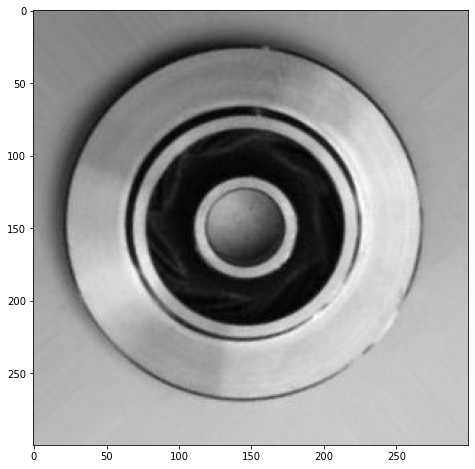

In [85]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')
plt.show()